In [35]:
import torch
import numpy as np
import time
import matplotlib.pyplot as plt

device = torch.device('cuda')

center = (-0.7492226869, 0.0756571369)
span = 0.00000001
extent = [center[0] - span, center[0] + span, center[1] - span, center[1] + span]
resolution = (2000,2000)
iterations = 2000

real = torch.linspace(extent[0], extent[1], resolution[1], device=device)
imag = (torch.linspace(extent[3], extent[2], resolution[0], device=device) * 1j)[None,:].T
c = real + imag
c_flat = c.flatten()


In [36]:
idxs = np.fromiter(np.ndindex(resolution), dtype=np.dtype((int, 2)))
idxs = torch.tensor(idxs, device=device)

In [37]:
z = torch.full(c_flat.shape, 0+0j, device=device)
image = torch.zeros(resolution, dtype=torch.int64, device=device)

In [38]:
calc_times = []
save_times = []

for iteration in range(iterations):
    start = time.monotonic()
    z = z**2 + c_flat
    mask = torch.abs(z) > 2
    end = time.monotonic()
    calc_times.append(end-start)

    # start = time.monotonic()
    # target_indexes = idxs[mask]
    # image[target_indexes[:,0], target_indexes[:,1]] = iteration
    # end = time.monotonic()
    # save_times.append(end-start)



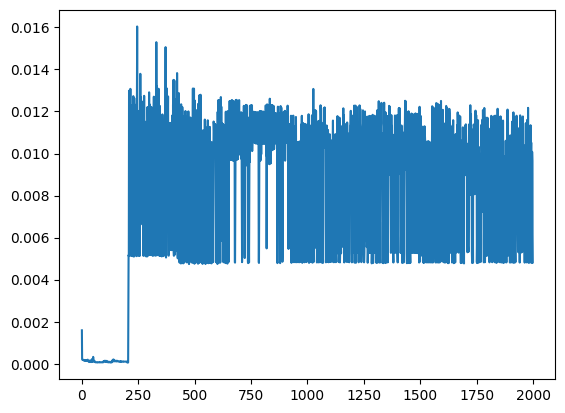

In [39]:
plt.plot(calc_times)
plt.plot(save_times)